## Tesla Exploratory Analysis

In [1]:
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ingest and Basic Exploration

In [2]:
from create_spark import CreateSparkSession

spark_obj = CreateSparkSession()
spark = spark_obj.session

23/10/02 08:58:25 WARN Utils: Your hostname, Wonseoks-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.35.161 instead (on interface en0)
23/10/02 08:58:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/wonseokchoi/Documents/Installs/spark-3.4.1-bin-hadoop3/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/wonseokchoi/.ivy2/cache
The jars for the packages stored in: /Users/wonseokchoi/.ivy2/jars
com.amazonaws#aws-java-sdk added as a dependency
org.apache.hadoop#hadoop-aws added as a dependency
io.delta#delta-core_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-3c04ecf5-1da5-48f2-8172-d152e7a1bc52;1.0
	confs: [default]
	found com.amazonaws#aws-java-sdk;1.11.563 in central
	found com.amazonaws#aws-java-sdk-ioteventsdata;1.11.563 in central
	found com.amazonaws#aws-java-sdk-core;1.11.563 in central
	found commons-logging#commons-logging;1.1.3 in central
	found org.apache.httpcomponents#httpclient;4.5.5 in central
	found org.apache.httpcomponents#httpcore;4.4.9 in central
	found commons-codec#commons-codec;1.10 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found com.fasterxml.jackson.core#jackson-databind;2.6.7.2 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.6.0 in central
	f

In [3]:
DF = spark.read.format('delta').load("s3a://wonseokchoi-data-lake-project/lake/gold/tsla/")

DF = DF.withColumn("timestamp", F.from_utc_timestamp("timestamp", "UTC"))
DF = DF.withColumn("timestamp", F.expr("timestamp - interval 5 hours"))
DF = DF.withColumn("timestamp", F.date_format("timestamp", 'yyyy-MM-dd HH:mm:ss'))
DF = DF.withColumnRenamed("avg_open", "open") \
    .withColumnRenamed("avg_high", "high") \
    .withColumnRenamed("avg_low", "low") \
    .withColumnRenamed("avg_close", "close") \
    .withColumnRenamed("avg_volume", "volume") \
    .withColumnRenamed("avg_volume_weighted", "volume_weighted")
DF = DF.select("timestamp", "open", "high", "low", "close", "volume", "volume_weighted").orderBy("timestamp", ascending=True)

df = DF.toPandas()
df.head()

,timestamp,open,high,low,close,volume,volume_weighted
0,2018-10-02 12:00:00,20.614018,20.614018,20.613661,20.614018,6818.035714,21.000000
1,2018-10-02 13:00:00,20.589731,20.590908,20.589731,20.590908,6962.307692,21.000000
2,2018-10-02 14:00:00,20.604588,20.604913,20.595925,20.602338,9727.500000,21.000000
3,2018-10-02 15:00:00,20.544992,20.545256,20.544498,20.544776,3803.100000,20.840000
4,2018-10-02 16:00:00,20.695957,20.699645,20.692638,20.696649,10334.739583,20.940972


In [4]:
df.describe()

,open,high,low,close,volume,volume_weighted
count,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000
mean,160.646685,160.656198,160.636813,160.646377,5394.682080,160.638405
std,111.661945,111.668005,111.655593,111.661722,9135.580404,111.673400
min,11.873407,11.874195,11.872649,11.873448,275.924370,12.000000
25%,28.719971,28.720325,28.719538,28.719908,1423.902206,29.000000
50%,185.621232,185.630406,185.599563,185.620122,3726.818182,185.593593
75%,248.384475,248.397491,248.367729,248.385662,7275.222026,248.330843
max,412.804294,412.832864,412.788914,412.817266,776757.000000,412.788043


In [5]:
df.shape

(19995, 7)

In [6]:
df.isnull().any()

timestamp          False
open               False
high               False
low                False
close              False
volume             False
volume_weighted    False
dtype: bool

### Basic Plot Explorations

In [7]:
df.set_index("timestamp", inplace=True)
df.head()

,open,high,low,close,volume,volume_weighted
timestamp,,,,,,
2018-10-02 12:00:00,20.614018,20.614018,20.613661,20.614018,6818.035714,21.000000
2018-10-02 13:00:00,20.589731,20.590908,20.589731,20.590908,6962.307692,21.000000
2018-10-02 14:00:00,20.604588,20.604913,20.595925,20.602338,9727.500000,21.000000
2018-10-02 15:00:00,20.544992,20.545256,20.544498,20.544776,3803.100000,20.840000
2018-10-02 16:00:00,20.695957,20.699645,20.692638,20.696649,10334.739583,20.940972


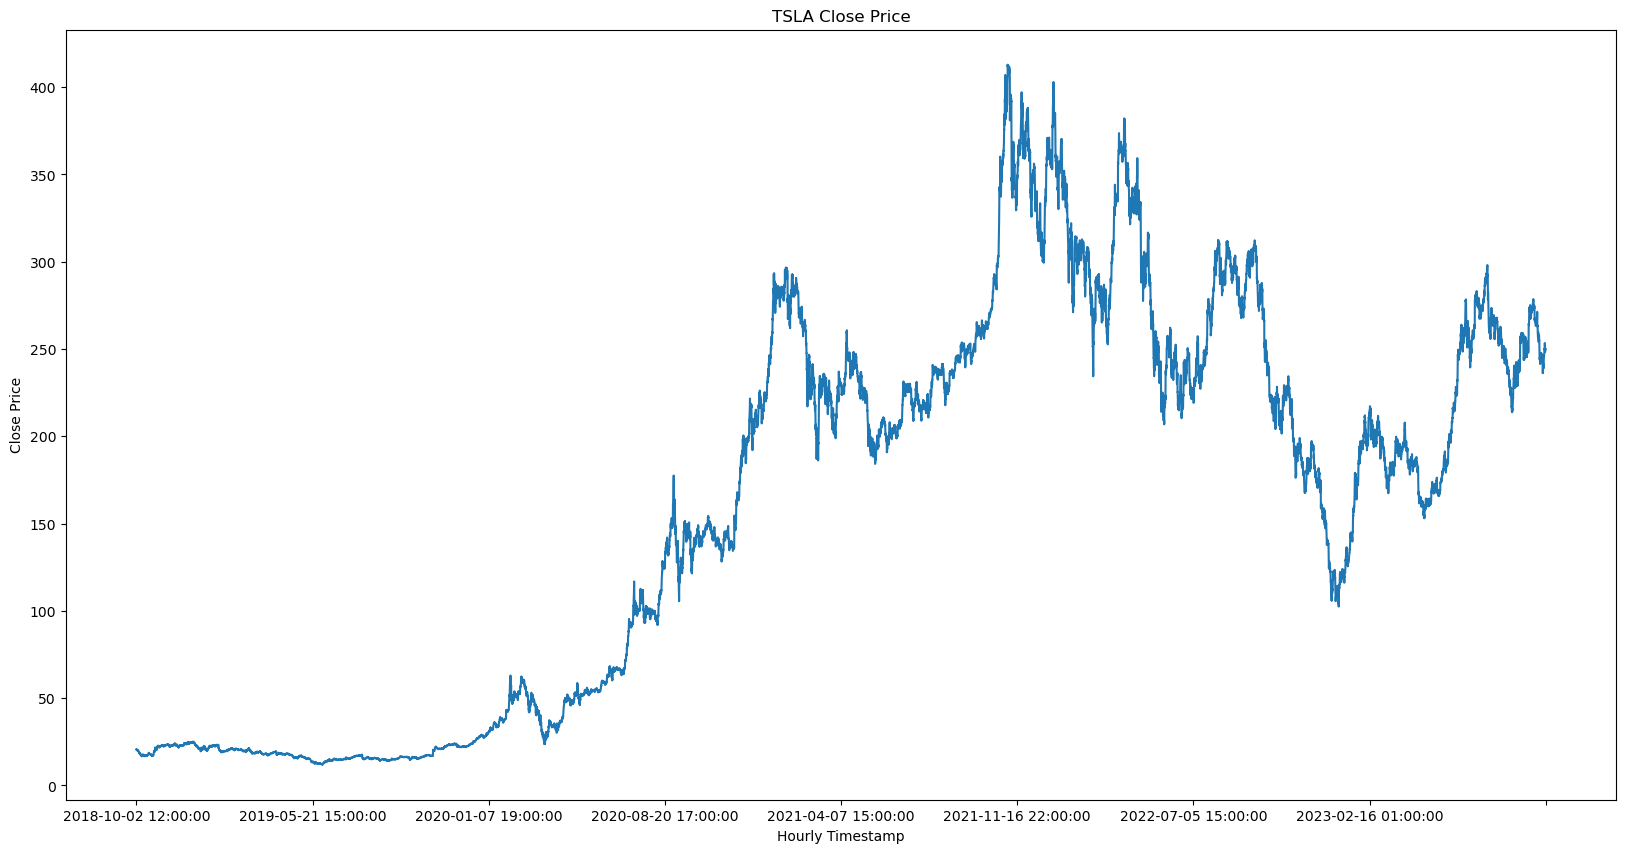

In [8]:
df['close'].plot(kind='line', figsize=(20, 10))
plt.title("TSLA Close Price")
plt.xlabel("Hourly Timestamp")
plt.ylabel("Close Price")
plt.show()

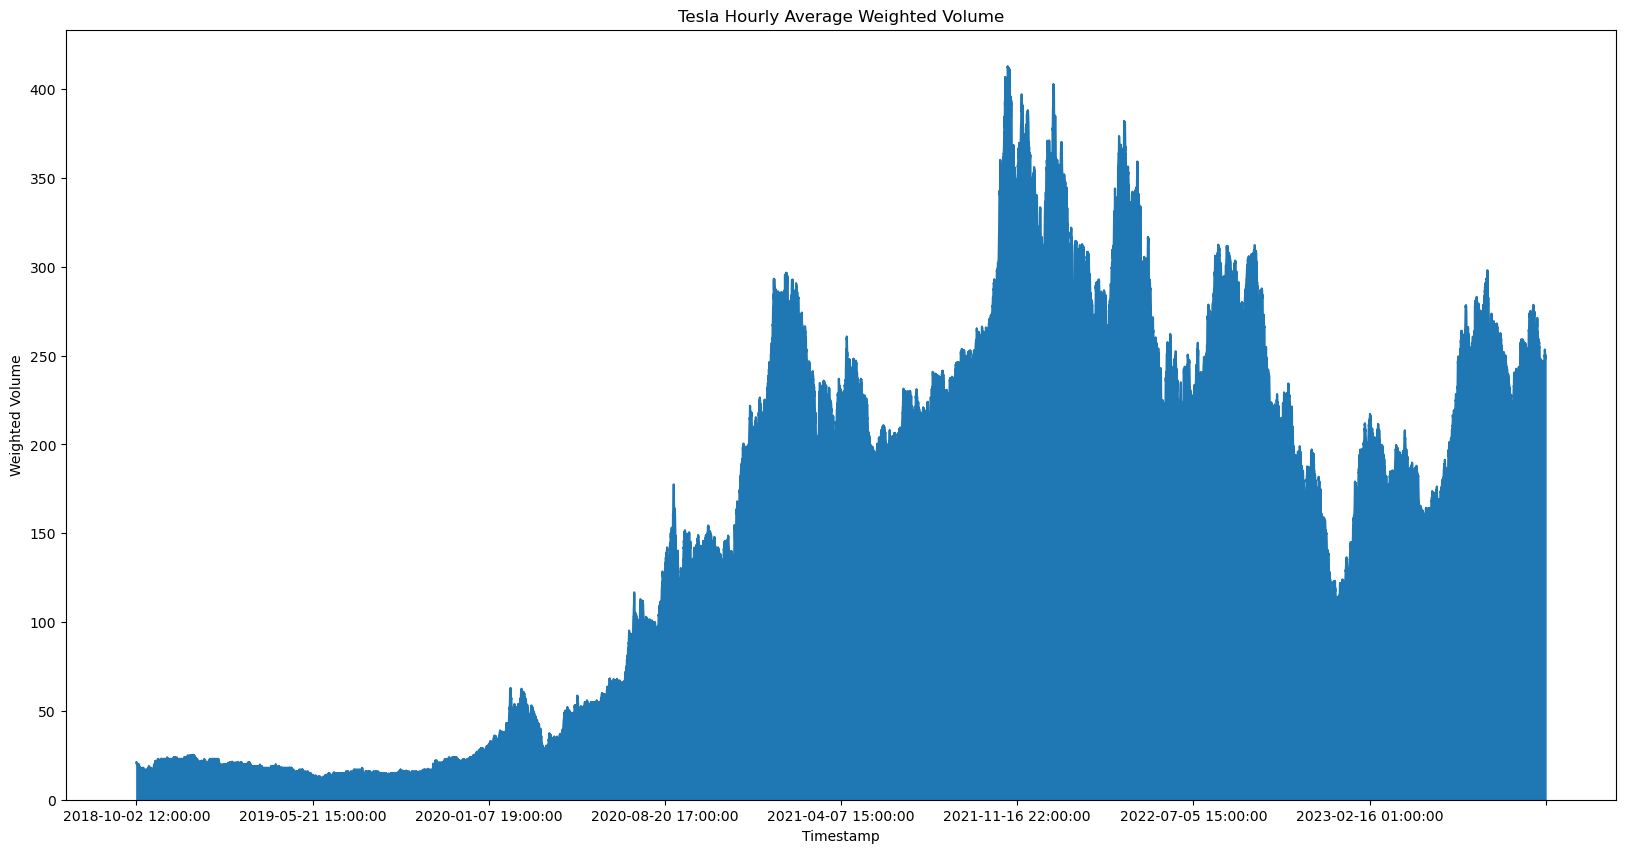

In [9]:
df['volume_weighted'].plot(kind='area', stacked=True, figsize=(20, 10))
plt.title('Tesla Hourly Average Weighted Volume')
plt.ylabel('Weighted Volume')
plt.xlabel('Timestamp')
plt.show()

### Statistics Exploration

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Mean over Time')

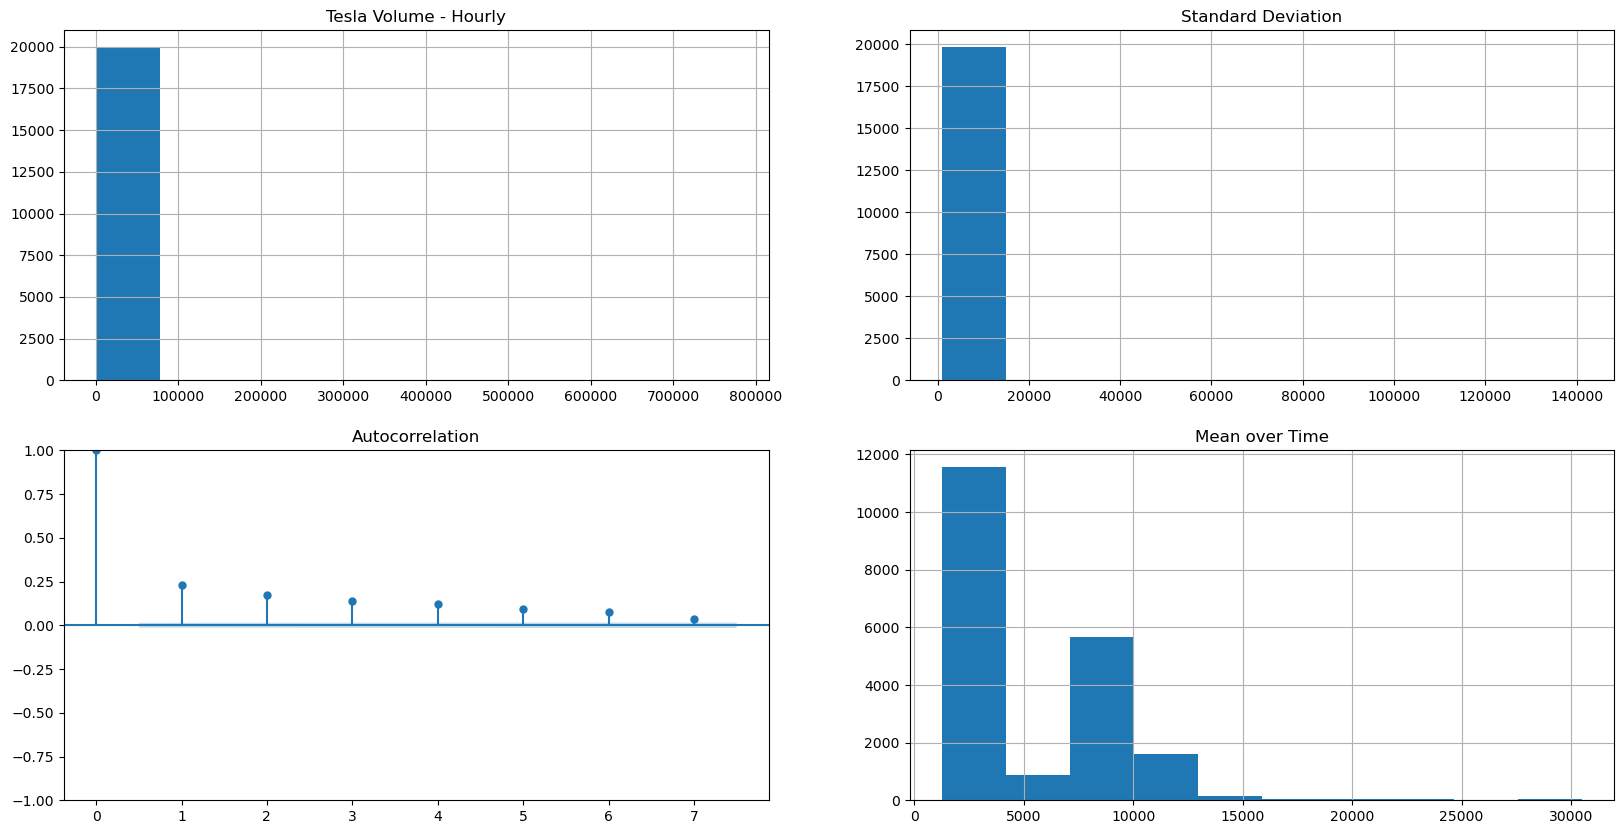

In [32]:
fig = plt.figure(figsize=(20,10))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df.volume.hist(ax=hist_ax)
hist_ax.set_title('Tesla Volume - Hourly')

series = df['volume'].dropna()

plot_acf(series, lags=7, ax=ac_ax)
ac_ax.set_title('Autocorrelation')

mm = df.volume.rolling(30).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title('Standard Deviation')

mm = df.volume.rolling(30).mean()
mm.hist(ax=mean_ax)
mean_ax.set_title('Mean over Time')

### Check Stationarity

In [33]:
from statsmodels.tsa.stattools import adfuller

X = df.volume.values
result = adfuller(X)

In [34]:
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -7.814373
p-value: 0.000000
Critical Values
	1%: -3.431
	5%: -2.862
	10%: -2.567
